In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MD = pd.read_csv(mouse_drug_data_to_load)
CT = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
DF = MD.merge(CT,on="Mouse ID")


# Display the data table for preview
#DF = DF.sort_values(by=['Timepoint','Metastatic Sites','Tumor Volume (mm3)','Mouse ID','Drug'],ascending=[True,True,False,True,True])
DF.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
DF2 = DF.groupby(['Drug','Timepoint']).mean()
DF2 = DF2.drop(columns=['Metastatic Sites'])
DF2 = DF2.rename(columns={'Tumor Volume (mm3)':'Mean of Tumor Volume (mm3)'})
DF2 = DF2.reset_index()
DF2.head(10)

,Drug,Timepoint,Mean of Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
DF3 = DF.groupby(['Drug','Timepoint']).sem()
DF3 = DF3.drop(columns=['Metastatic Sites','Mouse ID'])
DF3 = DF3.rename(columns={'Tumor Volume (mm3)':'Standard Error of Tumor Volume (mm3)'})
DF3 = DF3.reset_index()
DF3.head(10)

,Drug,Timepoint,Standard Error of Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
# Minor Data Munging to Re-Format the Data Frames
p_DF2 = DF2.pivot(index='Timepoint',columns='Drug',values='Mean of Tumor Volume (mm3)')
p_DF3 = DF3.pivot(index='Timepoint',columns='Drug',values='Standard Error of Tumor Volume (mm3)')
# Preview that Reformatting worked
p_DF2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


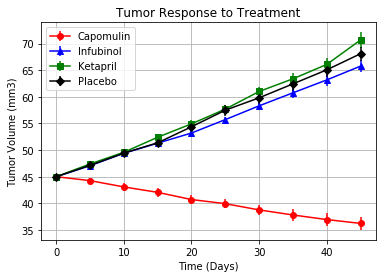

In [7]:
# Generate the Plot (with Error Bars)
plt.figure()

# == Method 1: use matplotlib plot indirectly for each data in dataframe. ==
drug_list_for_plot = ['Capomulin','Infubinol','Ketapril','Placebo']
colors = ['red','blue','green','black']
markers = ['o','^','s','D']
for i in range(0,4):
    plt.errorbar(np.arange(0,50,5),p_DF2[drug_list_for_plot[i]], color=colors[i], marker=markers[i],\
                 yerr = p_DF3[drug_list_for_plot[i]], label=drug_list_for_plot[i])
plt.legend()

# == Method 2: directly use matplotlib to plot dataframe. ==
# p_DF2.iloc[:, 0:5].plot(yerr = p_DF3.iloc[:, 0:5])   # only part of dataframe
# p_DF2.plot(yerr = p_DF3)                             # whole dataframe

plt.grid()
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
# Save the Figure
plt.savefig('PlotWithErrorBars_TumorResponseToTreatment.png')
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
DF4 = DF.groupby(['Drug','Timepoint']).mean()
DF4 = DF4.drop(columns=['Tumor Volume (mm3)'])
DF4 = DF4.rename(columns={'Metastatic Sites':'Mean of Metastatic Sites'})
DF4 = DF4.reset_index()
DF4.head(10)

,Drug,Timepoint,Mean of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
DF5 = DF.groupby(['Drug','Timepoint']).sem()
DF5 = DF5.drop(columns=['Tumor Volume (mm3)','Mouse ID'])
DF5 = DF5.rename(columns={'Metastatic Sites':'Standard Error of Metastatic Sites'})
DF5 = DF5.reset_index()
DF5.head(10)

,Drug,Timepoint,Standard Error of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
p_DF4 = DF4.pivot(index='Timepoint',columns='Drug',values='Mean of Metastatic Sites')
p_DF5 = DF5.pivot(index='Timepoint',columns='Drug',values='Standard Error of Metastatic Sites')
p_DF4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


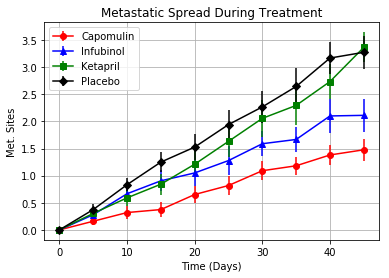

In [16]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
plt.figure()
# == Method 1 ==
drug_list_for_plot = ['Capomulin','Infubinol','Ketapril','Placebo']
colors = ['red','blue','green','black']
markers = ['o','^','s','D']
for i in range(0,4):
    plt.errorbar(np.arange(0,50,5),p_DF4[drug_list_for_plot[i]], color=colors[i], marker=markers[i],\
                 yerr = p_DF5[drug_list_for_plot[i]], label=drug_list_for_plot[i])
plt.legend()

###== Method 2 ==
# p_DF4.iloc[:, 0:5].plot(yerr = p_DF5.iloc[:, 0:5])   # only part of dataframe
# p_DF4.plot(yerr = p_DF5)                             # whole dataframe

plt.grid()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Met. Sites')
# Save the Figure
plt.savefig('PlotWithErrorBars_MetastaticSpread.png')

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
DF6 = DF.groupby(['Drug','Timepoint'])[['Mouse ID']].count()
DF6 = DF6.reset_index()
DF6 = DF6.rename(columns={'Mouse ID':'Mouse Count'})
DF6['Survival rate (%)'] = 100.*(DF6['Mouse Count']/25)
DF6.head(10)

,Drug,Timepoint,Mouse Count,Survival rate (%)
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
5,Capomulin,25,22,88.0
6,Capomulin,30,22,88.0
7,Capomulin,35,22,88.0
8,Capomulin,40,21,84.0
9,Capomulin,45,21,84.0


In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
p_DF6 = DF6.pivot(index='Timepoint',columns='Drug',values='Survival rate (%)')
p_DF6

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


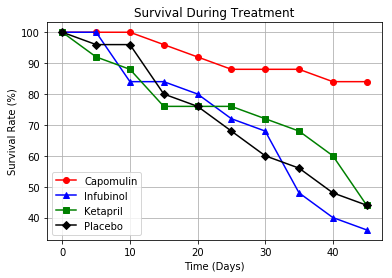

In [19]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

# == Method 1 ==
drug_list_for_plot = ['Capomulin','Infubinol','Ketapril','Placebo']
colors = ['red','blue','green','black']
markers = ['o','^','s','D']
for i in range(0,4):
    plt.errorbar(np.arange(0,50,5),p_DF6[drug_list_for_plot[i]], color=colors[i], marker=markers[i],\
                 label=drug_list_for_plot[i])
plt.legend()

# == Method 2 ==
# p_DF6.iloc[:, 0:5].plot()   # only part of dataframe
# p_DF6.plot()                             # whole dataframe

plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
# Save the Figure
plt.savefig('PlotWithErrorBars_Survival.png')

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
# Display the data to confirm
Percent_changes = 100.*(p_DF2.iloc[9,:]-p_DF2.iloc[0,:])/p_DF2.iloc[0,:]
Percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

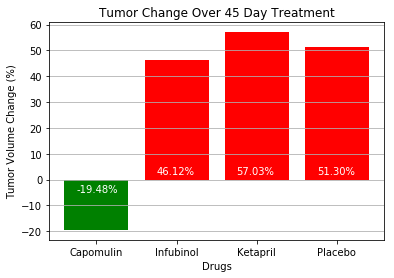

In [21]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure

DF_bar = pd.DataFrame({'Drug':Percent_changes.index.tolist(),'Percent Changes (%)':Percent_changes.values.tolist()})
DF_bar = DF_bar.set_index('Drug')
DF_bar4drugs = DF_bar.loc[DF_bar.index.isin(drug_list_for_plot)]
DF_bar4drugs = DF_bar4drugs.reset_index()
DF_bar4drugs['PorN'] = DF_bar4drugs['Percent Changes (%)']>0
plt.bar(DF_bar4drugs['Drug'],DF_bar4drugs['Percent Changes (%)'],color=DF_bar4drugs.PorN.map({True: 'r', False: 'g'}))
for i, v in enumerate(DF_bar4drugs['Percent Changes (%)']):
    if v > 0:
        plt.text(i-0.25,2,'{:.2f}%'.format(v),color='w')
    else:
        plt.text(i-0.25,-5,'{:.2f}%'.format(v),color='w')
plt.gca().yaxis.grid(True)
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Drugs')
plt.ylabel('Tumor Volume Change (%)')
plt.savefig('BarChart_TumorChange.png')

## Description 

- Tumor response to treatment
Different drugs have different degrees of suppression on tumor growth. Some drugs (e.g., Capomulin) can not only suppress tumor growth, but also reduce tumor volume. 

- Metastatic spread during treatment
All kinds of drug can't stop metastatic spread immediately. However, different drugs have different speed to suppress metastatic spread (some of drugs (e.g., Ketapril) don't suppress metastatic spread). We can observe dramatic suppression done by Capomulin. 

- Survival during treatment
Capomulin has the most impressive survival rate compared to other drugs.

- Bar chart
This chart shows the quantification of how efficiency of tumor volume change due to drugs. Capomulin decreases tumor volume impressively compared to other drugs. 